In [4]:
# showing plots for data from 3/5/25
# the sweeping data was collected with 1 source meter, collecting I_DS and I_GS
# this data was DMF-based aptamer functionalization on b3d4
# the time series data was done only using 1 channel
# the timeseries was done with 0.01X PBS
# the funcionalization was done using PEG-NH2 and ETA as quenchers


In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

In [47]:
# filenames

# filenames for functionalization
filenames_a_func = ['data/data_3-5-25/b3d4a-init.csv', 
                 'data/data_3-5-25/b3d4a-pbase.csv', 
                 'data/data_3-5-25/b3d4a-apt.csv',
                 'data/data_3-5-25/b3d4a-peg.csv',
                 'data/data_3-5-25/b3d4a-eta.csv',]

filenames_b_func = ['data/data_3-5-25/b3d4b-init.csv', 
                 'data/data_3-5-25/b3d4b-pbase(blank).csv', 
                 'data/data_3-5-25/b3d4b-apt(blank).csv',
                 'data/data_3-5-25/b3d4b-peg(blank).csv',
                 'data/data_3-5-25/b3d4b-eta(blank).csv',]

# filenames for different concs of PBS
filenames_a_pbs = ['data/data_3-5-25/b3d4a-p001x.csv',
                   'data/data_3-5-25/b3d4a-p01x.csv',
                   'data/data_3-5-25/b3d4a-p1x.csv',
                   'data/data_3-5-25/b3d4a-eta.csv',
                   'data/data_3-5-25/b3d4a-10x.csv',]

filenames_b_pbs = ['data/data_3-5-25/b3d4b-p001x(blank).csv',
                   'data/data_3-5-25/b3d4b-p01x(blank).csv',
                   'data/data_3-5-25/b3d4b-p1x(blank).csv',
                   'data/data_3-5-25/b3d4b-eta(blank).csv',
                   'data/data_3-5-25/b3d4b-10x(blank).csv',]


In [59]:
def load_csv_data_1ch(filenames):
    '''
    for multiple file
    6, 4
    works for cases where time sweeps have different number of samples 
    '''
    data_list = []
    for filename in filenames:
        data_device = np.genfromtxt(filename, delimiter=',', skip_header=1, filling_values=np.nan).T[[6, 4], :]
        data_device = np.nan_to_num(data_device)
        data_device[1,:] *= 1000.0
        num_time_samples = data_device.shape[-1]
        data_list.append(data_device[:,-1*num_time_samples//2:][:, ::-1])
    # list of elements of shape (voltages/currents), voltage_sweep, 
    # index is device_num
    return data_list



def get_dirac_points(IV_list):
    dirac_ivs_list = []
    for IV_mx in IV_list:
        dirac_idx = np.argmin(IV_mx[1])
        dirac_iv = IV_mx[:,dirac_idx]
        dirac_ivs_list.append(dirac_iv)
    return np.array(dirac_ivs_list)

data_1 = load_csv_data_1ch(filenames_a_func)
data_1_dirac = get_dirac_points(data_1)

data_2_blank = load_csv_data_1ch(filenames_b_func)
data_2_blank_dirac = get_dirac_points(data_2_blank)

print(len(data_1), data_1[0].shape)
print(data_1_dirac.shape)
# print(len(data_2_blank), data_2[0].shape)
# print(data_2_blank_dirac.shape)


data_1_pbs = load_csv_data_1ch(filenames_a_pbs)
data_1_dirac_pbs = get_dirac_points(data_1_pbs)

data_2_blank_pbs = load_csv_data_1ch(filenames_b_pbs)
data_2_blank_dirac_pbs = get_dirac_points(data_2_blank_pbs)

print(len(data_1_pbs), data_1_pbs[0].shape)
print(data_1_dirac_pbs.shape)

5 (2, 201)
(5, 2)
5 (2, 201)
(5, 2)


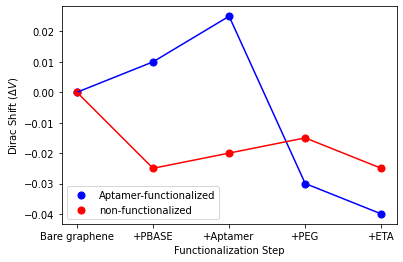

In [60]:
def plot_func_steps(dirac_mx_func_list, dirac_mx_func_blank_list, title):

    xlabels = ['Bare graphene', '+PBASE', '+Aptamer', '+PEG', '+ETA']
    labels = ['Aptamer-functionalized', 'non-functionalized'] # , 'DMF functionalization']
    colors = ['blue', 'red', 'orange']
    for dev_num in range(len(dirac_mx_func_list)):
        plt.scatter(range(dirac_mx_func_list[dev_num][:,0].size), dirac_mx_func_list[dev_num][:,0] - dirac_mx_func_list[dev_num][0,0], s=50, color=colors[0], label=labels[0])
        plt.plot(range(dirac_mx_func_list[dev_num][:,0].size), dirac_mx_func_list[dev_num][:,0] - dirac_mx_func_list[dev_num][0,0], color=colors[0], label=labels[0])

        plt.scatter(range(dirac_mx_func_blank_list[dev_num][:,0].size), dirac_mx_func_blank_list[dev_num][:,0] - dirac_mx_func_blank_list[dev_num][0,0], s=50, color=colors[1], label=labels[1])
        plt.plot(range(dirac_mx_func_blank_list[dev_num][:,0].size), dirac_mx_func_blank_list[dev_num][:,0] - dirac_mx_func_blank_list[dev_num][0,0], color=colors[1], label=labels[1])

    handles, labels = plt.gca().get_legend_handles_labels()
    unique = {}
    for handle, label in zip(handles, labels):
        if label not in unique:
            unique[label] = handle
    # sorted_unique = dict(sorted(unique.items(), key=lambda x: x[0]))
    # plt.legend(sorted_unique.values(), sorted_unique.keys())
    plt.legend(unique.values(), unique.keys())

    plt.xlabel('Functionalization Step')
    plt.ylabel(rf'Dirac Shift $(\Delta V)$')
    plt.title(title)
    plt.xticks(range(len(xlabels)), xlabels)
    plt.show()
    plt.close()

plot_func_steps([data_1_dirac], [data_2_blank_dirac], '')

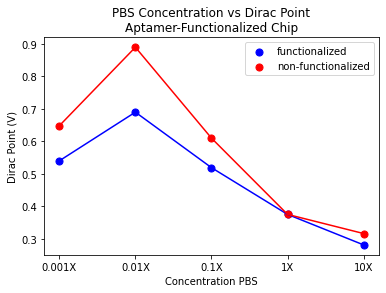

In [61]:
def plot_pbs_dirac(dirac_mx_pbs_list, dirac_mx_pbs_blank_list, title):
    xlabels = ['0.001X', '0.01X', '0.1X', '1X', '10X']
    colors = ['red', 'blue']
    labels = ['functionalized', 'non-functionalized']
    colors = ['blue', 'red']
    
    for dev_num in range(len(dirac_mx_pbs_list)):
        plt.scatter(range(dirac_mx_pbs_list[dev_num][:,0].size), dirac_mx_pbs_list[dev_num][:,0], s=50, color=colors[0], label=labels[0])
        plt.plot(range(dirac_mx_pbs_list[dev_num][:,0].size), dirac_mx_pbs_list[dev_num][:,0], color=colors[0], label=labels[0])

        plt.scatter(range(dirac_mx_pbs_blank_list[dev_num][:,0].size), dirac_mx_pbs_blank_list[dev_num][:,0], s=50, color=colors[1], label=labels[1])
        plt.plot(range(dirac_mx_pbs_blank_list[dev_num][:,0].size), dirac_mx_pbs_blank_list[dev_num][:,0], color=colors[1], label=labels[1])

    handles, labels = plt.gca().get_legend_handles_labels()
    unique = {}
    for handle, label in zip(handles, labels):
        if label not in unique:
            unique[label] = handle
    sorted_unique = dict(sorted(unique.items(), key=lambda x: x[0]))
    plt.legend(sorted_unique.values(), sorted_unique.keys())

    plt.xlabel('Concentration PBS')
    plt.ylabel('Dirac Point (V)')
    plt.title(title)
    plt.xticks(range(len(xlabels)), xlabels)
    plt.show()
    plt.close()


plot_pbs_dirac([data_1_dirac_pbs], [data_2_blank_dirac_pbs], 'PBS Concentration vs Dirac Point\nAptamer-Functionalized Chip')

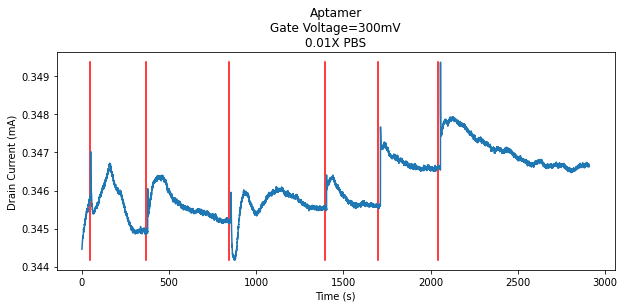

In [70]:
def plot_time_series_1ch(file_path, max_time_sample, xval_action_list, title):
    data_timesweep = np.genfromtxt(file_path, delimiter=",", dtype=np.float64, filling_values=np.nan)
    data_timesweep = data_timesweep[1:max_time_sample,[4,3]].T
    
    data_timesweep[1,:] *= 1000.0
    
    plt.figure(figsize=(10, 4))
    
    minim = np.min(data_timesweep[1])
    maxim = np.max(data_timesweep[1])
    for xval in xval_action_list:
        plt.plot([xval, xval], [minim, maxim], color='r')
    
    plt.plot(data_timesweep[0], data_timesweep[1])
    plt.xlabel('Time (s)')
    plt.ylabel('Drain Current (mA)')
    plt.title(title)
    plt.show()
    plt.close()

file_path = 'data/data_3-5-25/b3d4a-timesweep-antigen.csv'
max_time_sample = 29102
xval_action_list = [45, 370, 845, 1395, 1700, 2045]
title = 'Aptamer\nGate Voltage=300mV\n0.01X PBS'
plot_time_series_1ch(file_path=file_path, 
                     max_time_sample=max_time_sample, 
                     xval_action_list=xval_action_list, 
                     title=title)
